In [29]:
mainPath = %pwd
modelPath = mainPath + r"\Tensorflow\workspace\exported-models\my_model\saved_model"
labelPath = mainPath + r"\Tensorflow\workspace\annotations\label_map.pbtxt"
imgPath = mainPath + r"\data\test_data\test_data"

In [30]:
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Loading model...', end='')
# Load saved model and build the detection function
detect_fn=tf.saved_model.load(modelPath)
print('Done!')

Loading model...Done!


In [31]:
%pwd

'C:\\Users\\Linden\\GitHub\\AutonomousCars'

In [32]:
labelPath

'C:\\Users\\Linden\\GitHub\\AutonomousCars\\Tensorflow\\workspace\\annotations\\label_map.pbtxt'

In [33]:
category_index=label_map_util.create_category_index_from_labelmap(labelPath, use_display_name=True)

In [34]:
img=[imgPath+r'\16.png',imgPath+r'\143.png']
print(img)

['C:\\Users\\Linden\\GitHub\\AutonomousCars\\data\\test_data\\test_data\\16.png', 'C:\\Users\\Linden\\GitHub\\AutonomousCars\\data\\test_data\\test_data\\143.png']


Running inference for C:\Users\Linden\GitHub\AutonomousCars\data\test_data\test_data\16.png... Done


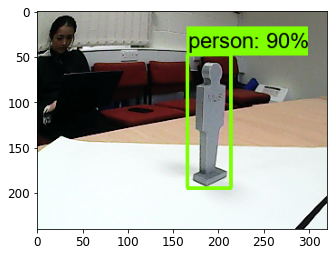

Running inference for C:\Users\Linden\GitHub\AutonomousCars\data\test_data\test_data\143.png... Done


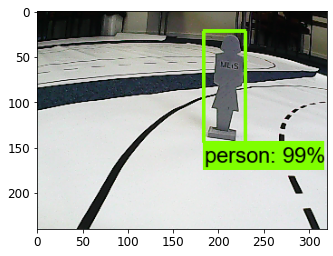

In [43]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams.update({'font.size': 12})


def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

for image_path in img:
    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)
    input_tensor=tf.convert_to_tensor(image_np)
    input_tensor=input_tensor[tf.newaxis, ...]
    detections=detect_fn(input_tensor)
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections=image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,     
          min_score_thresh=.5,      
          agnostic_mode=False)      
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()